PCA: keeping pictures as coeff and eigenvector basis and testing a test image  that is to find the minimun distance having image represented


21


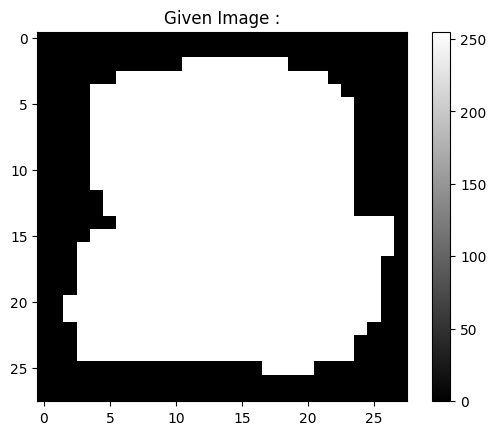

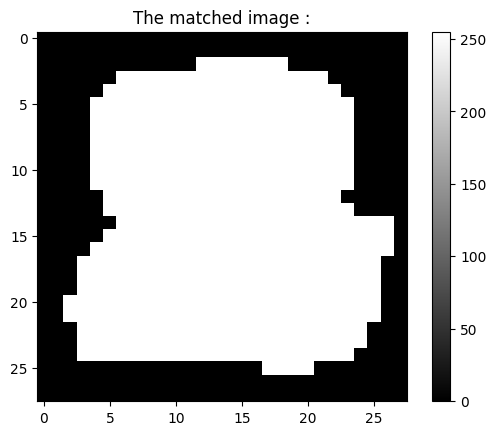

In [ ]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
import math

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train[y_train == 2][: 100]

"""The reshape(-1, 28 * 28) part indicates that you want to reshape the array into a two-dimensional array where the second dimension
 (number of columns) is 28 * 28, and the first dimension is inferred based on the size of the original array. The -1 in the first dimension
 means that NumPy should automatically compute the size of that dimension to preserve the total number of elements. This results in a shape of (100, 784).
In summary:
The first version (reshape(1, 28 * 28)) creates a one-dimensional array with shape (1, 784).
The second version (reshape(-1, 28 * 28)) creates a two-dimensional array with shape (100, 784)"""
# Display one image of training X data set using Matplotlib
"""plt.imshow(X[0], cmap='gray', vmin=0, vmax=255)
plt.title('Grayscale Image')
plt.colorbar()  # Add a colorbar to show intensity values
plt.show()"""

#flattening the array
X = X_train[y_train == 2][: 100].reshape(-1, 28 * 28)
#computing mean
X_mean=np.mean(X, axis=0) # axis to specify that mean is calculated on the
# centering data
for i in range(0,100):
  X[i]=X[i]-X_mean

Y=np.transpose(X) #our X in copy
# we in general represent our actual dataset as d*n but here we are doing as n*d anyways since d=784>>n=100 we would generate a covariance matrix of n*n or XX'
C=np.dot(X,Y)
# C=np.devide(C,100) when its X'X/n  in this case
eigenvalues, eigenvectors = np.linalg.eig(C)
# Sort eigenvalues in descending order
sorted_eigenvalues_desc = np.sort(eigenvalues)[::-1]
List_of_eigenValues=[] # list of 51 nlambda
list_of_eigenVectors=[] # list of 51 Wk
List_of_coeff=[] # list of list of 51 coeff for each x


for i in range(0,51):
  nlambda=sorted_eigenvalues_desc[i]
  List_of_eigenValues.append(nlambda)

  index=np.where(eigenvalues==nlambda)[0][0]
  eigenVector=eigenvectors[:,index] #beta

  nlambda=math.sqrt(nlambda)
  eigenVector=np.divide(eigenVector,nlambda) #alpha

  eigenVector=np.dot(Y,eigenVector) #Wk
  list_of_eigenVectors.append(eigenVector)

for i in range(0,100): # each Xi
  L=[]
  for j in range(0,51):
    coeffXi_ofWj = np.dot(np.transpose(Y[:,i]),list_of_eigenVectors[j])
    L.append( coeffXi_ofWj)
  List_of_coeff.append(L)


################representing test image
test_image = X_test[y_test == 2][0].reshape(28 * 28)
copy_test_image=test_image
test_image = np.dot(np.transpose(test_image) ,list_of_eigenVectors[0])  *   list_of_eigenVectors[0]
for j in range(1,51):
  test_image = test_image + ( np.dot(np.transpose(copy_test_image) ,list_of_eigenVectors[j])  *   list_of_eigenVectors[j])


minDist= 3000000000000
##################representing all other xis to compute distance between xi and test image
for i in range(0,100):
  ithtrain_image_represented= List_of_coeff[i][0]  *   list_of_eigenVectors[0]
  for j in range(1,51):
    ithtrain_image_represented = ithtrain_image_represented + ( List_of_coeff[i][j] *   list_of_eigenVectors[j])
  distance = np.linalg.norm(ithtrain_image_represented - test_image, ord=2)
  if distance < minDist:
    minDist=distance
    k=i


#plotting reprsented test image
test_image = test_image.reshape(28 , 28)
plt.imshow(test_image, cmap='gray', vmin=0, vmax=255)
plt.title('Given Image :')
plt.colorbar()  # Add a colorbar to show intensity values
plt.show()


#plotting matched train image
kthtrain_image_represented= List_of_coeff[k][0] *   list_of_eigenVectors[0]
for j in range(1,51):
  kthtrain_image_represented = kthtrain_image_represented + ( List_of_coeff[k][j] *   list_of_eigenVectors[j])

kthtrain_image_represented =   kthtrain_image_represented.reshape(28,28)
plt.imshow(kthtrain_image_represented, cmap='gray', vmin=0, vmax=255)
plt.title('The matched image :')
plt.colorbar()  # Add a colorbar to show intensity values
plt.show()


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

KERNAL PCA

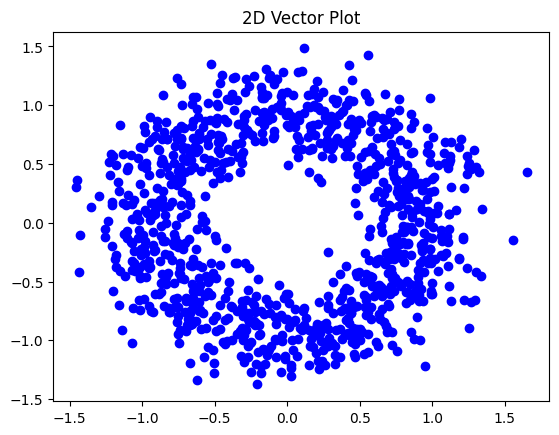

[[0.02392691508329827, 0.03773065099992666], [0.021853029060735902, -0.016128513888836633], [0.0158103073976456, -0.052137474764531344], [-0.01068638058866074, 0.029684289015228404], [-0.042381509823381805, -0.00408010098525353], [0.026463416361619797, 0.024544042768857355], [-0.0033224263316524007, 0.048360211181462456], [-0.034630502994073165, -0.033832105037941304], [0.004622413684129084, -0.06510102921142258], [-0.03219264806623995, -0.024506353468958544], [0.017840113982767462, 0.031175166549494766], [-0.009743863976168613, 0.04582381891033474], [0.008361231977341378, -0.027823884142010532], [-0.016769849708889756, -0.03882335139524671], [-0.013475050528685367, 0.03399327599971789], [-0.008611091576447336, 0.038475091029849896], [0.029745286520069383, -0.005783225645140624], [-0.03205844686748534, -0.0050299103141558865], [0.01160957106505986, 0.05379364290707864], [-0.02413836569060692, 0.03481729856252272], [-0.005856291518963065, 0.037636599314199576], [0.032684311518326806, 0.

<ipython-input-3-93a50a2b7f27>:70: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff1=float(np.dot(np.transpose(list_of_eigenvectors[0]),KC[i]))
<ipython-input-3-93a50a2b7f27>:71: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff2=float(np.dot(np.transpose(list_of_eigenvectors[1]),KC[i]))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, factor=0.9, noise=0.2, random_state=0)
"""Certainly! The provided code utilizes the scikit-learn library to generate a synthetic dataset consisting of 1000 points arranged in concentric circles.
 The make_circles function is employed with specific parameters:
n_samples: Determines the total number of generated points (set to 1000).
factor: Governs the relative size of inner and outer circles, with a value of 0.9 creating a gap between them.
noise: Introduces random noise (set to 0.2) for a more realistic dataset.
random_state: An optional parameter, when set, ensures reproducibility by using a fixed seed for the random number generator.
Upon execution, the variable X holds a 2D array containing point coordinates, and y is a 1D array with labels (0 or 1) indicating the circle membership of each point.
Typically, this dataset is employed in binary classification tasks aiming to classify points into their respective circles."""

# Extract x and y components
x_values = [v[0] for v in X]
y_values = [v[1] for v in X]

# Create a scatter plot
plt.scatter(x_values, y_values, color='blue', marker='o', label='2D Vectors')
plt.title('2D Vector Plot')
plt.show()

K_polynomial= np.zeros((1000, 1000))

for i in range(1000):
    for j in range(1000):
        K_polynomial[i, j] = (np.dot(X[i], X[j]) + 1) ** 2


K = np.zeros((1000, 1000))

for i in range(1000):
    for j in range(1000):
        K[i, j] = np.exp(-np.linalg.norm(X[i]- X[j])**2 / (2 * 2**2)) #sigma =2

######producing centered matrix with respect to polynomial kernal
sum=0
K_poly=K_polynomial
for i in range(1000):
  if i==j :
    sum= sum + K_polynomial[i,j]
extra2 = sum/(1000**2)
extra1=[]
for i in range(1000):
  Ki=0
  for l in range(1000):
    Ki=Ki+K[i,l]
  extra1.append(Ki*(2/1000))
for i in range(1000):
  for j in range(1000):
    K_polynomial[i,j]=K_polynomial[i,j] - extra1[i] + extra2
KC=K_polynomial

#computing eigenVectors of KC
eigenvalues, eigenvectors = np.linalg.eig(KC)
sorted_eigenvalues_desc = np.sort(eigenvalues)[::-1]

#computing normalized eigen vectors : two principal components or alphas
list_of_eigenvectors=[]
for i in range(2):
  index=np.where(eigenvalues==sorted_eigenvalues_desc[i])[0][0]
  eigenVector=eigenvectors[:,index]
  eigenVector=np.divide(eigenVector,sorted_eigenvalues_desc[i])
  list_of_eigenvectors.append(eigenVector)

#calculating projection coefficients on those principal componenets
coeff=[] #coeff_of_xi_represented_in_higher_dimension
for i in range(1000):
  coeff1=float(np.dot(np.transpose(list_of_eigenvectors[0]),KC[i]))
  coeff2=float(np.dot(np.transpose(list_of_eigenvectors[1]),KC[i]))
  coeff.append([coeff1,coeff2])

print(coeff)


CLUSTERING


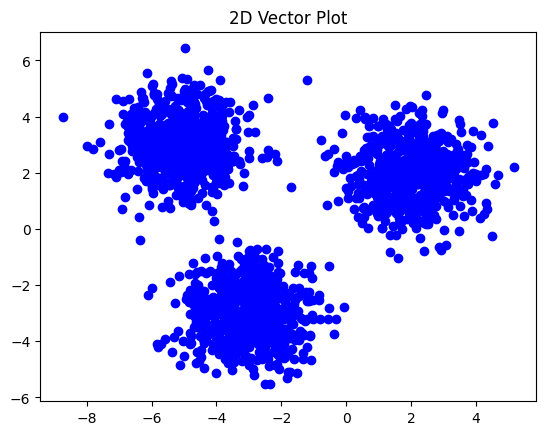

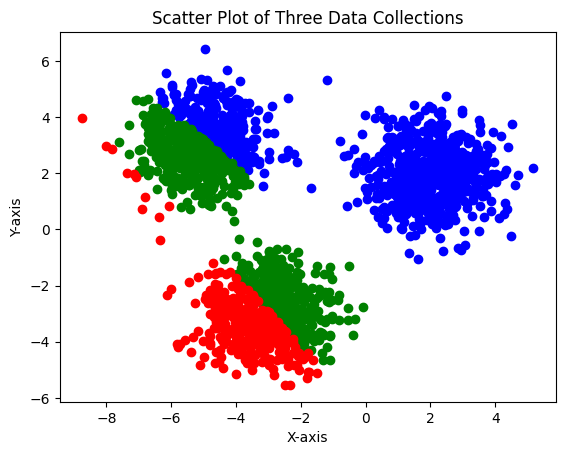

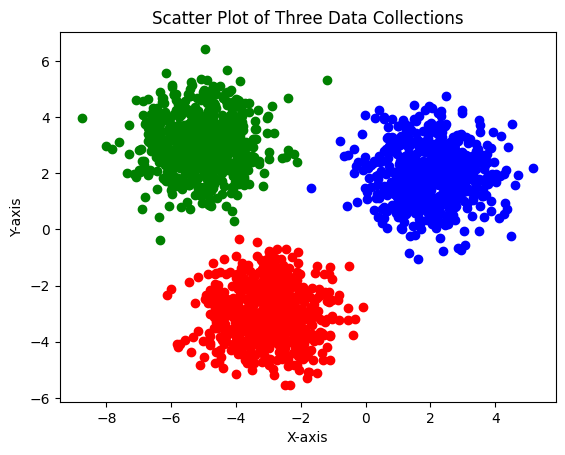

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0) # seed function adds specificity to the random numbers generated to be same for every run

N = 2000
data1 = np.random.randn(N//3,2) + np.array([2,2]) # adds array to each row or each inner lists
data2 = np.random.randn(N//3,2) + np.array([-3,-3]) # each data group has N//3 no of data points each of size 2
data3 = np.random.randn(N//3,2) + np.array([-5,3])
X = np.concatenate((data1, data2, data3)) #total 1998 lists or data points each of size 2
x_values = [v[0] for v in X]
y_values = [v[1] for v in X]
plt.scatter(x_values,y_values, color='blue', marker='o', label='2D Vectors')
plt.title('2D Vector Plot')
plt.show()


#Assume k = 3. Take the data points with indices 200, 800 and 1200 in X to be the initial cluster centers.
means=[]
means.append(X[200])
means.append(X[800])
means.append(X[1200])

# function assign_clusters(X, k, cluster_centers) that assigns a cluster to each data point as per their distance from each cluster centre and returns a vector z, where  z[i]∈{0,1,2} .
def assign_clusters(X, k, cluster_centers):
  Z=[]
  for v in X:
    min= 1000000000000
    for i in range(k):
      distance= np.linalg.norm(v - cluster_centers[i], ord=2)
      if distance<min:
        min=distance
        got=i
    Z.append(got)
  return Z

ans= assign_clusters(X,3,means)
datak1 = []
datak2 = []
datak3 = []

for i in range(1998):
    if ans[i] == 0:
        datak1.append(X[i])
    elif ans[i] == 1:
        datak2.append(X[i])
    elif ans[i] == 2:
        datak3.append(X[i])

# Convert lists to arrays otherwise scatter plot is difficult
datak1 = np.array(datak1)
datak2 = np.array(datak2)
datak3 = np.array(datak3)

plt.scatter(datak1[:, 0], datak1[:, 1], color='blue')
plt.scatter(datak2[:, 0], datak2[:, 1], color='green')
plt.scatter(datak3[:, 0], datak3[:, 1], color='red')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Three Data Collections')
plt.show()

#a function compute_cluster_centers(X, z, k) that computes the clusters' centers as per z and returns k new cluster centers.
def compute_cluster_centers(datak1,datak2,datak3):
  m=[]
  m.append(np.mean(datak1, axis=0))
  m.append(np.mean(datak2, axis=0))
  m.append(np.mean(datak3, axis=0))
  return m
# new means now
means= compute_cluster_centers(datak1,datak2,datak3)

#########################################################################################################################################################################

for i in range(10):
  ans= assign_clusters(X,3,means)
  dataak1 = []
  dataak2 = []
  dataak3 = []

  for i in range(1998):
    if ans[i] == 0:
        dataak1.append(X[i])
    elif ans[i] == 1:
        dataak2.append(X[i])
    elif ans[i] == 2:
        dataak3.append(X[i])

    # Convert lists to arrays otherwise scatter plot is difficult
    datak1 = np.array(dataak1)
    datak2 = np.array(dataak2)
    datak3 = np.array(dataak3)

    means= compute_cluster_centers(datak1,datak2,datak3)

plt.scatter(datak1[:, 0], datak1[:, 1], color='blue')
plt.scatter(datak2[:, 0], datak2[:, 1], color='green')
plt.scatter(datak3[:, 0], datak3[:, 1], color='red')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Three Data Collections')
plt.show()



EM ALGORITHM

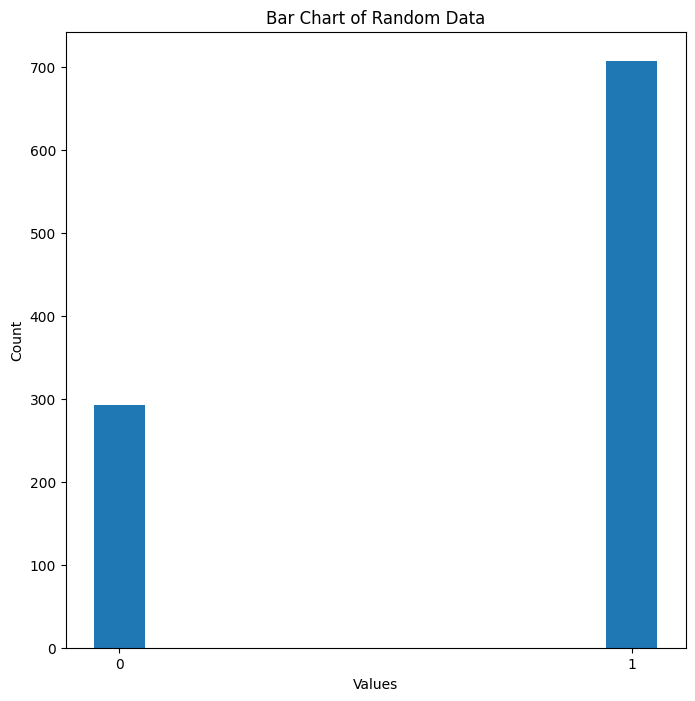

0.707





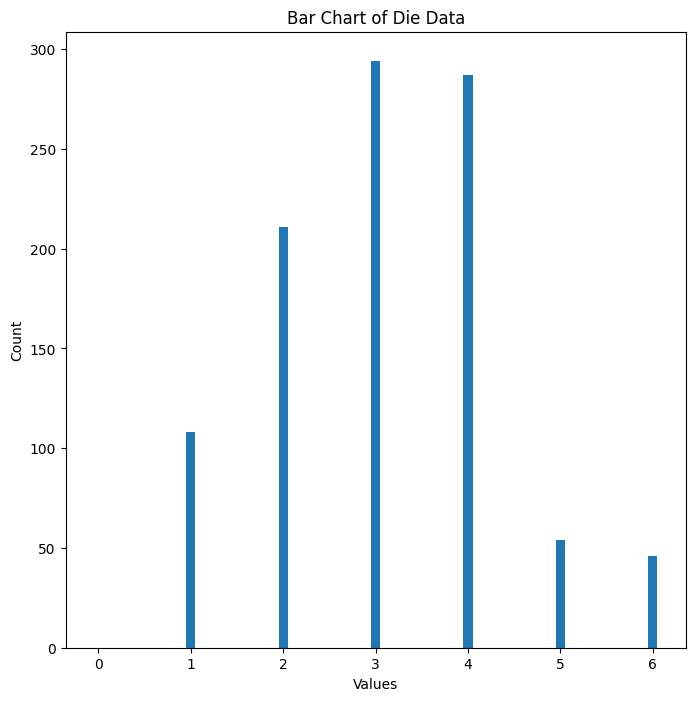

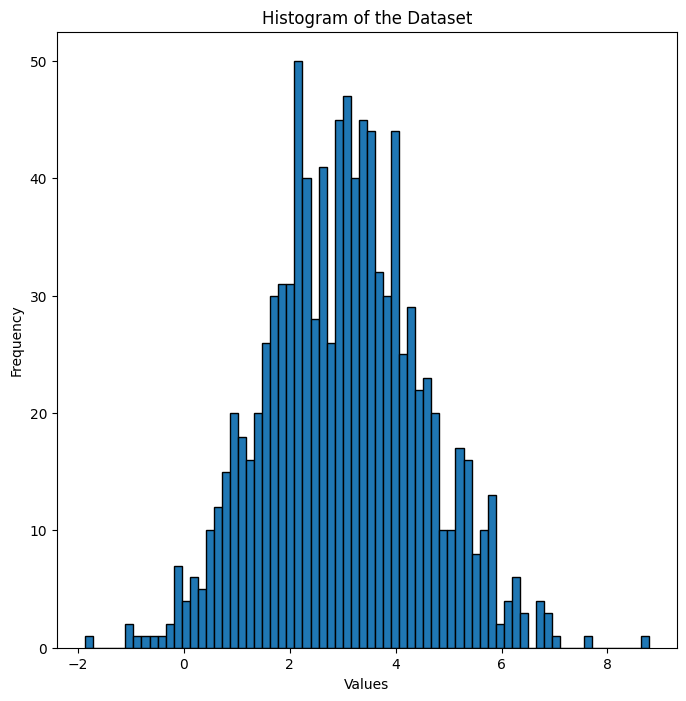

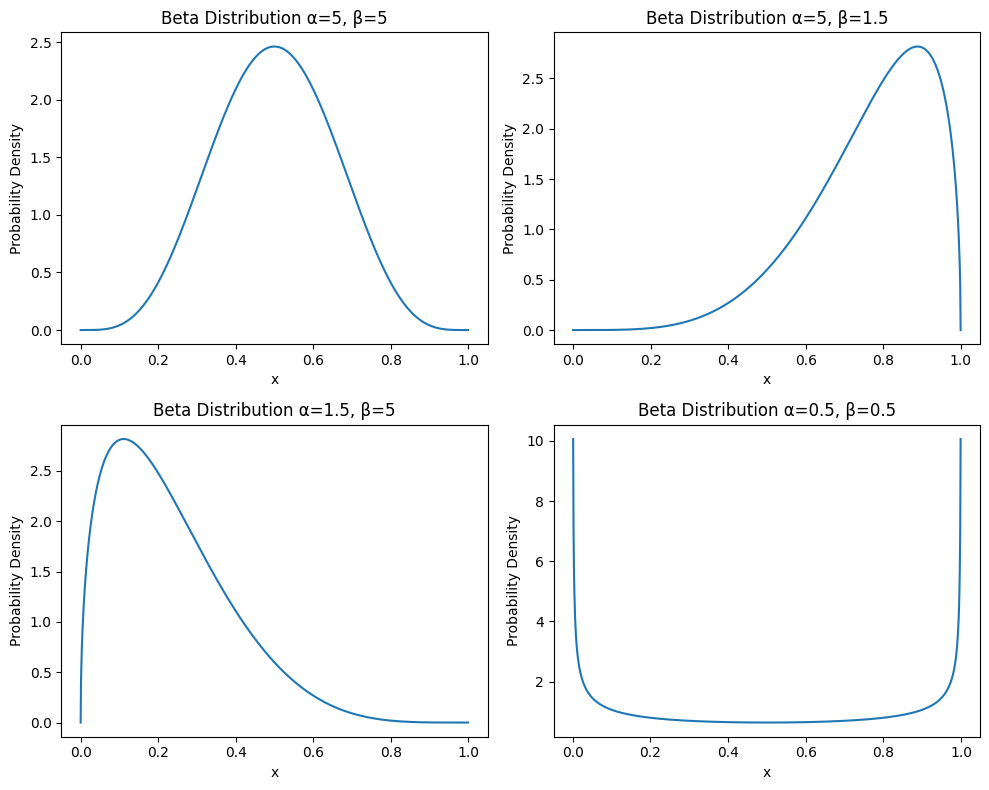

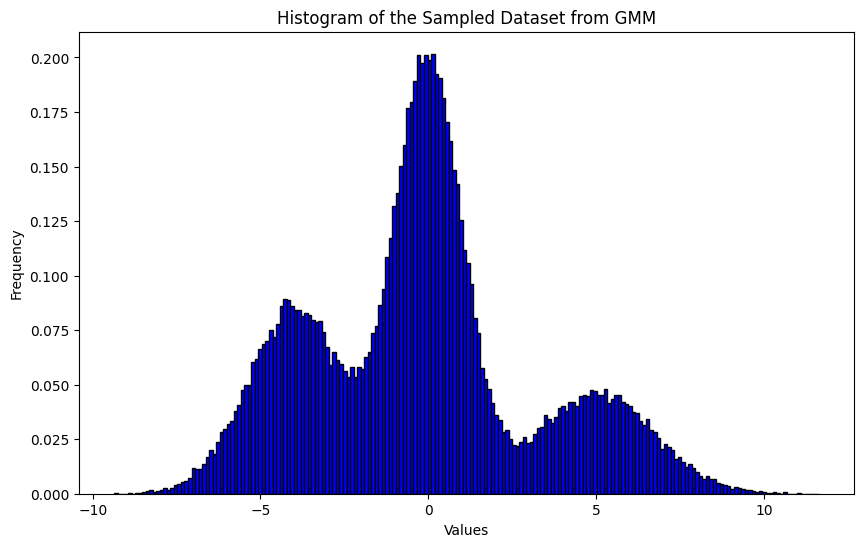




0.9999998066000001
9.99999806600049e-06


'\nwhile((np.linalg.norm(thetak1 - thetak, ord=2))>0.01) :\n  thetak=thetak1\n  lambdk1=estep(thetak,X)\n  thetak1=mstep(lambdk1,X)\n\nprint(thetak1) '

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.stats import norm

# Set size of figure
plt.rcParams['figure.figsize'] = [8, 8]
# Set size of font
plt.rcParams['font.size'] = 10

#Generating random 1000 integers between[0,1]
rng = np.random.default_rng(seed = 1001)
"""X = rng.integers(0, 2, size = 1000)""" # this will always produce bernoulli p=0.5 as default
# to specify probability
X = rng.choice([0, 1], size = 1000, p = [0.3,0.7]) # probability of 0, 1

# plotting the data
counts = np.bincount(X)
# Generate x-coordinates for each bar (0 and 1)
x_positions = np.arange(len(counts))
# Plotting the bar chart
plt.bar(x_positions, counts, width=0.1, tick_label=[0, 1])
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Bar Chart of Random Data')
plt.show()

#although its known that parameter of the dataset is p=0.7 we are here o calculate the maximum likelihood of the parameter
#for bernoulli its just the average of the data
sum=0
for i in X:
  sum=sum+i
p=sum/1000
print(p) # estimate of p
print("\n\n")
######################################################### DIE-6 faces #######################################################################


#now sampling 1000 datapoints where each data point represent a face of a die
np.random.seed(42)
values = np.arange(1, 7)
probabilities = [0.1,0.2,0.3,0.3,0.05,0.05]
X2 = np.random.choice(values, size=1000, p=probabilities)
# ml estimate for p3
sum2=0
for i in X2:
  if i==3:
    sum2=sum2+1
p3=sum2/1000

# plotting the data
counts2 = np.bincount(X2)
# Generate x-coordinates for each bar (0 and 1)
x_positions2 = np.arange(len(counts2))
# Plotting the bar chart
plt.bar(x_positions2, counts2, width=0.1)
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Bar Chart of Die Data')
plt.show()
print("\n\n")
############################################################################ GAUSSIAN #######################################################
np.random.seed(42)
mean = 3
std_dev = 1.5
dataset = np.random.normal(loc=mean, scale=std_dev, size=1000)
# Calculate the maximum likelihood estimate (MLE) of the mean
mle_mean = np.mean(dataset)
#plotting histogram
plt.hist(dataset, bins=70, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of the Dataset')
plt.show()
print("\n\n")
########################################################################### BETA #############################################################

alpha_values = [5, 5, 1.5, 0.5]
beta_values = [5, 1.5, 5, 0.5]

# Set up subplots
plt.figure(figsize=(10, 8)) #10 corresponds to the width of the figure in inches. 8 corresponds to the height of the figure in inches.

# Subplot 1
plt.subplot(2, 2, 1)
x1 = np.linspace(0, 1, 1000) # linspace gives 1000 values between 0 to 1 EVENLY SPACED
plt.plot(x1, beta.pdf(x1, alpha_values[0], beta_values[0]))  #beta.pdf calculates the y value of the plot that is P(X1[i]) as beta pdf
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title(f'Beta Distribution α={alpha_values[0]}, β={beta_values[0]}')

# Subplot 2
plt.subplot(2, 2, 2)
x2 = np.linspace(0, 1, 1000)
plt.plot(x2, beta.pdf(x2, alpha_values[1], beta_values[1]))
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title(f'Beta Distribution α={alpha_values[1]}, β={beta_values[1]}')

# Subplot 3
plt.subplot(2, 2, 3)
x3 = np.linspace(0, 1, 1000)
plt.plot(x3, beta.pdf(x3, alpha_values[2], beta_values[2]))
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title(f'Beta Distribution α={alpha_values[2]}, β={beta_values[2]}')

# Subplot 4
plt.subplot(2, 2, 4)
x4 = np.linspace(0, 1, 1000)
plt.plot(x4, beta.pdf(x4, alpha_values[3], beta_values[3]))
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title(f'Beta Distribution α={alpha_values[3]}, β={beta_values[3]}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
print('\n\n')

############################################################################## GMM #############################################################
# Set seed for reproducibility
np.random.seed(42)

# Parameters for the GMM
pi = [0.3, 0.5, 0.2]  # Mixture probabilities
means = [-4, 0, 5]    # Means
variances = [2, 1, 3]  # Variances
num_samples = 100000

# Step 1: Sample mixture indices
mixture_indices = np.random.choice(len(pi), size=num_samples, p=pi)

# Step 2: Sample points from the selected mixtures
X = np.zeros(num_samples)

for i in range(num_samples):
    k = mixture_indices[i]  # Selected mixture index
    mu = means[k]
    sigma = np.sqrt(variances[k])

    # Sample from the Gaussian distribution of the selected mixture
    sample_point = np.random.normal(mu, sigma)

    X[i] = sample_point

#plotting GMM
plt.figure(figsize=(10, 6))
plt.hist(X, bins=200, color='blue', edgecolor='black', density=True)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of the Sampled Dataset from GMM')
plt.show()
print("\n\n")

## EM ALGORITHM
# ...
## EM ALGORITHM
def init():
  theta=[]
  theta.append(1)
  theta.append(2)
  theta.append(3)
  theta.append(1)
  theta.append(1)
  theta.append(1)
  theta.append(1/3)
  theta.append(1/3)
  theta.append(1/3)
  return theta

#a function estep that accepts theta and X as arguments. It should perform the E-step and return an array lambda
# of shape (n, K). The element lambda[i][k] is equal to  λik . For the purposes of evaluation, run the function on theta_0 and X
def estep(theta, X):
  lambdc=[]
  for i in range(100000):
    listi=[]
    denominator=0
    for j in range(3):
      denominator=denominator + (theta[6+j] * norm.pdf(X[i], loc=theta[j], scale=np.sqrt(theta[4+j])))
    for j in range(3):
      neumerator=theta[6+j] * norm.pdf(X[i], loc=theta[j], scale=np.sqrt(theta[4+j]))
      value=neumerator/denominator
      listi.append(value)
    lambdc.append(listi)
  lambd = np.array(lambdc)
  #lambd = lambd / np.linalg.norm(lambd, axis=1, keepdims=True)
  # Adjust each row to ensure its sum is exactly 1
  #lambd /= np.sum(lambd, axis=1, keepdims=True)
  # Print the sum of each row
  lambd /= np.sum(lambd, axis=1, keepdims=True)
  print(np.sum(lambd, axis=1))

  return lambd

# a function mstep that accepts lamb and X as arguments. It should perform the M-step and return a NumPy array theta, the updated parameters
def mstep(lambd, X):
  theta=[]
  for j in range(3):
    getnm=0
    getnn=0
    for i in range(100000):
      getnn=getnn + (lambd[i][j] * X[i])
      getnm=getnm + lambd[i][j]
    value=getnn/getnm
    theta.append(value)

  for j in range(3):
    getnm=0
    getnn=0
    for i in range(100000):
      getnn=getnn + (lambd[i][j] * ((X[i]-theta[j])**2))
      getnm=getnm + lambd[i][j]
    value=getnn/getnm
    theta.append(value)

  for j in range(3):
    getx=0
    for i in range(100000):
      getx=getx + lambd[i][j]
    getx=getx/100000
    theta.append(getx)
  theta=np.array(theta)
  return theta

thetak=init()
lambdk1=estep(thetak,X)
thetak1=mstep(lambdk1,X)
print(thetak)
while((np.linalg.norm(thetak1 - thetak, ord=2))>0.01) : # or till 100 or 50 iterations
  thetak=thetak1
  lambdk1=estep(thetak,X)
  thetak1=mstep(lambdk1,X)
  print(np.linalg.norm(thetak1 - thetak, ord=2))
  print(thetak1)

 SUPERVISED LEARNING : linear and kernal regression

5.330250334407473
5.330250334407473
5.302126839260622


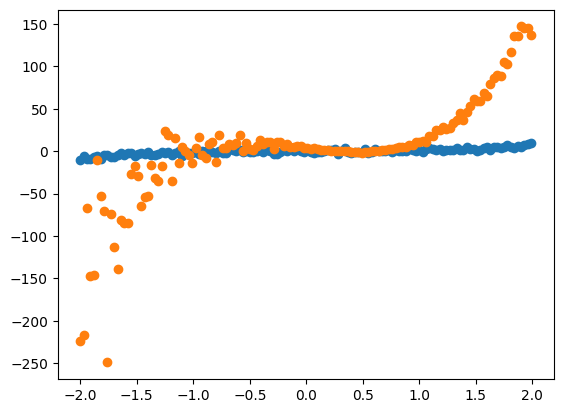

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import boston_housing
Train, test = boston_housing.load_data(seed= 111)
Training_data, labels = Train[0], Train[1]
Test_data, test_labels = test[0], test[1]
DATA = np.insert(Training_data, 0, 1, axis=1)
DATA_test = np.insert(Test_data, 0, 1, axis=1)
DATA = np.transpose(DATA) # to convert to shape (d,n)
DATA_test = np.transpose(DATA_test)
W= np.dot((np.linalg.inv(np.dot(DATA,np.transpose(DATA)))),(np.dot(DATA,labels)))
Ynew=list(np.dot(np.transpose(DATA_test),W)) # DETECTED TEST Y
Ynew = [round(element, 1) for element in Ynew]
#print(Ynew)
#print(list(test_labels)) # ACTUAL Y OF TEST

# CALCULATING LOSS
loss=0
for i in range(len(Ynew)):
  loss=loss+ (test_labels[i]-Ynew[i])**2
loss=loss/len(Ynew)
loss=(loss)**(0.5)
print(loss)

#Find the weights using the gradient descent. Use a constant learning rate of  η=10−10 . Initialize the weight vector as zero vector and update the weights for 100 iterations.
for i in range(99):
  W = W - ((10**(-10)) *  (2*(np.dot((np.dot(DATA,np.transpose(DATA))),W) - np.dot(DATA,labels))))

Ynew=list(np.dot(np.transpose(DATA_test),W)) # DETECTED TEST Y
Ynew = [round(element, 1) for element in Ynew]
#print(Ynew)
#print(list(test_labels)) # ACTUAL Y OF TEST

loss=0
for i in range(len(Ynew)):
  loss=loss+ (test_labels[i]-Ynew[i])**2
loss=loss/len(Ynew)
loss=(loss)**(0.5)
print(loss)

#Find the weights using the stochastic gradient descent. Use a constant learning rate of  η=10−8 . Initialize the weight vector as zero vector and update the weights for 1000 iterations. .
#Take the batch size of  ⌈number of samples/5⌉ . For sampling the batch examples in  ith  iteration, set seed at  i . The final weight is the last updated weight.
# Do not take the avearge of weights updated in all the iterations.
W= np.dot((np.linalg.inv(np.dot(DATA,np.transpose(DATA)))),(np.dot(DATA,labels)))
for i in range(999):
    n = np.random.choice(404, size=80, replace=False)
    X = DATA[:, n]
    Y = labels[n]
    W = W - ((10**(-8)) *  (2*(np.dot((np.dot(X,np.transpose(X))),W) - np.dot(X,Y))))

Ynew=list(np.dot(np.transpose(DATA_test),W)) # DETECTED TEST Y
Ynew = [round(element, 1) for element in Ynew]
#print(Ynew)
#print(list(test_labels)) # ACTUAL Y OF TEST

loss=0
for i in range(len(Ynew)):
  loss=loss+ (test_labels[i]-Ynew[i])**2
loss=loss/len(Ynew)
loss=(loss)**(0.5)
print(loss)

####################################################################-----KERNAL REGRESSION---(its ridge version form )--##########################################################################
rng = np.random.default_rng(seed = 101)
x = np.arange(-2, 2, 0.01).reshape(-1, 1)
y = x**3 + rng.normal(0, 1, x.shape[0]).reshape(-1, 1) # np.array( produce (n,)) reshape makes it(n,1)
#Add the dummy feature in the feature matrix Xand reshape it to the shape  (d,n) .
DATA_kernal = np.column_stack((np.ones(x.shape[0]), x[:, 0] + 1))
DATA_kernal = np.transpose(DATA_kernal)
Xtest = np.arange(-2, 2, 0.03).reshape(-1, 1) # function is used to create an array with regularly spaced values within a given range. step=0.03
ytest= Xtest**3 + rng.normal(0, 1.5, Xtest.shape[0]).reshape(-1, 1)
DATA_testK = np.column_stack((np.ones(Xtest.shape[0]), Xtest[:, 0] + 1))   # this dont work here DATA_testK = np.insert(Xtest, 0, 1, axis=1)
DATA_testK = np.transpose(DATA_testK)
#Our task is to apply the kernel regression with polynomial kernel of degree 3. We know that weight vector can be written as
#w=ϕ(x)α let us call the vector  α  as coefficient vector
K = np.power(np.dot(DATA_kernal.T, DATA_kernal) + 1 , 3)
lambda_values = [0.001, 0.01, 0.1, 1, 10, 100]
alpha = np.dot(np.linalg.inv(K + 10),y) # a regularizing constatnt (K+ almbdaI)-1
W_star=np.dot(DATA_kernal,alpha)
#Plot the scatter plot between feature and the labels of test data before and after
plt.scatter(Xtest,ytest)
# NO - plt.scatter(Xtest,np.dot(DATA_testK.T,W_star)) since x, y has non linear relation therefore y = ϕ(x).T * W_star and since we dont know ϕ(x) we do this
YTEST=[]
for j in range (Xtest.shape[0]):
  y_in=0
  for i in range(len(list(alpha))):
    y_in = y_in + (alpha[i] * (((x[i] * Xtest[j])+ 1)**3))
  YTEST.append(y_in)
YTEST=np.array(YTEST)

plt.scatter(Xtest,YTEST)

DECISION TREE AND KNN

Entropy of parent =  0.7219280948873623


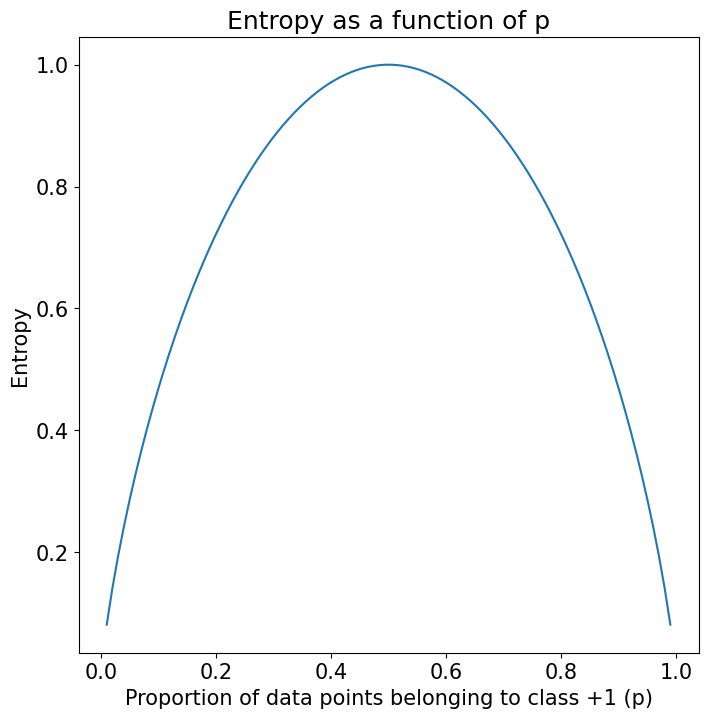

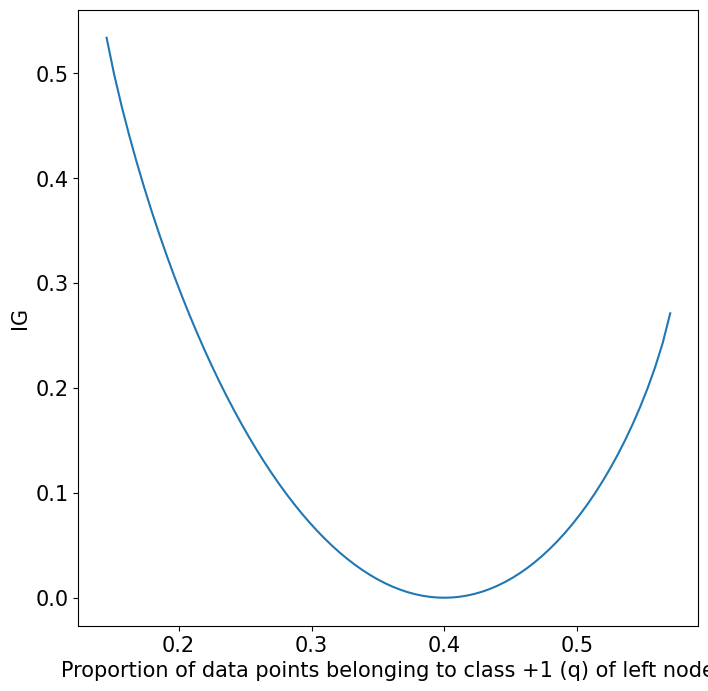

----------------------------------------------------------------------------------------






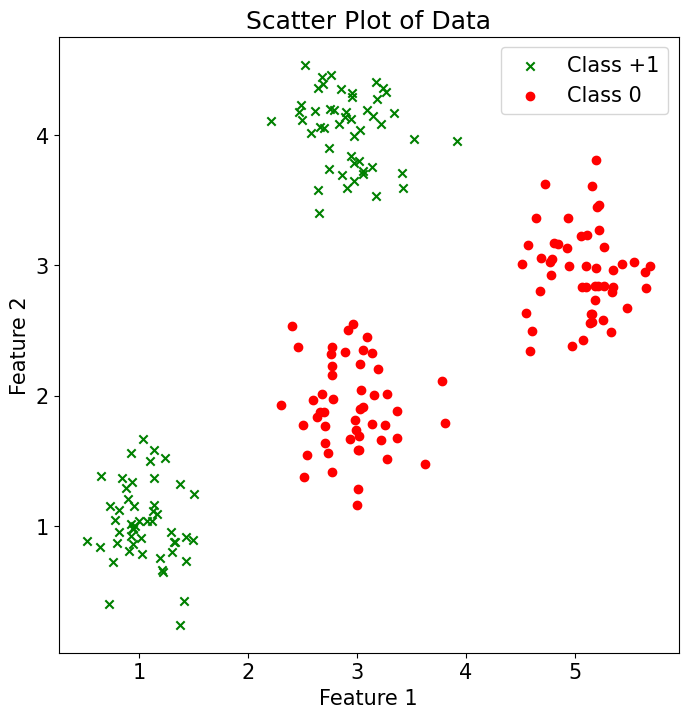


 RED





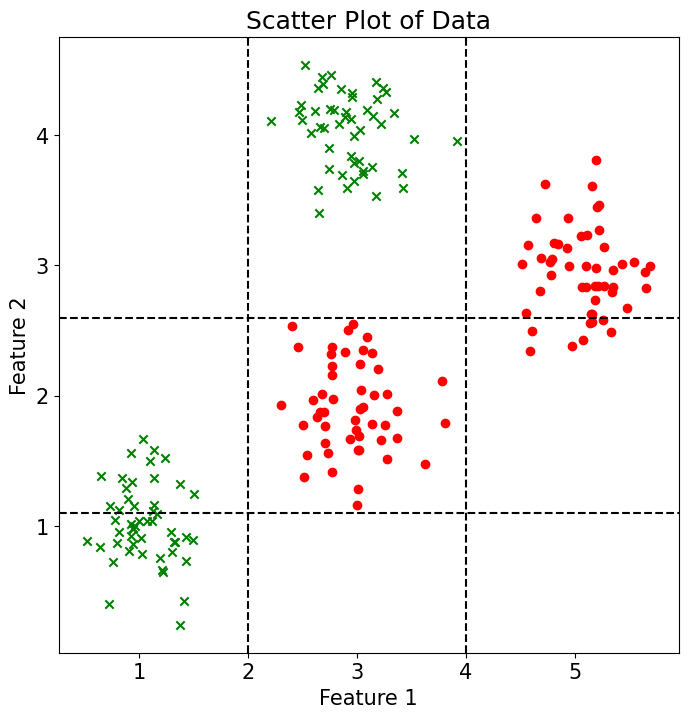

----------------------------------------------------------------------------------------






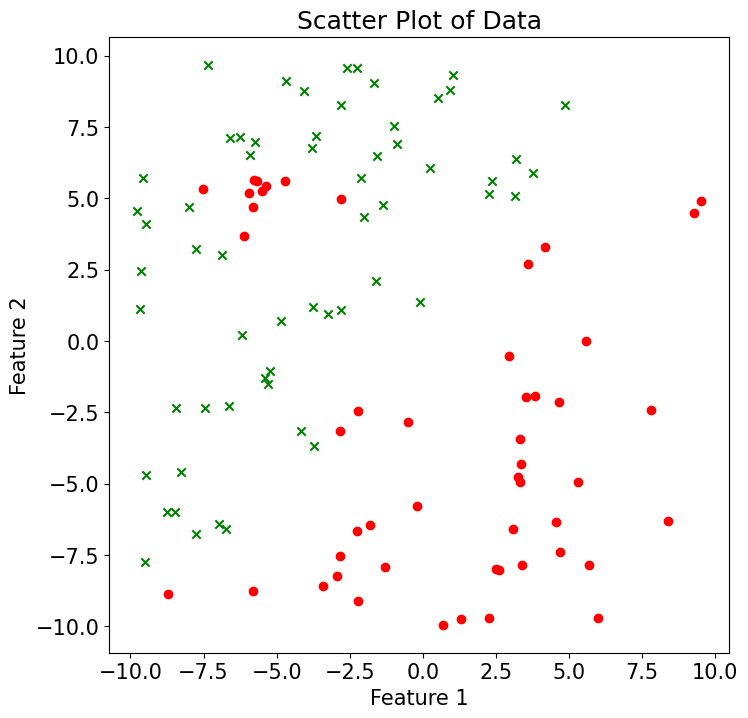



0


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['font.size'] = 15

#A decision stump is a decision tree that has a single question at the root node which splits into two leaf nodes.
#A decision stump partitions the dataset based on a single question:  fk<θ . This is therefore the simplest decision tree that we can come up with.
#Use the following decision stump for problems 1 and 3: The root has  1000  data-points out of which  200  belong to class-1. The left child-node has
#100  data-points out of which  50  belong to class-1.
#Write a function entropy that accepts the proportion of points that belong to class-1 in a node as argument and returns the entropy. Use  log2  for all computations.
def entropy(p):
  q = 1-p
  return (-((p * np.log2(p)) + (q * np.log2(q))))

#Use this function to compute the entropy of the parent node.
print('Entropy of parent = ', entropy(0.2))

#Plot the entropy of a node as a function of  p , the proportion of data-points that belong to class  +1 .

# Generate values for p between 0 and 1
p_values = np.linspace(0.01, 0.99, 100)
# Calculate entropy for each value of p
entropy_values = [entropy(p) for p in p_values]
plt.plot(p_values, entropy_values, label='Entropy')
plt.title('Entropy as a function of p')
plt.xlabel('Proportion of data points belonging to class +1 (p)')
plt.ylabel('Entropy')
plt.show()


#Write a function IG that accepts the following arguments:
"""E: entropy of the parent node Q
El: entropy of the left child L
Er: entropy of the right child R
gamma: proportion of data-points in left child
Use this function to compute the information gain for the parent node."""
def IG(E, El, Er, gamma):
   c = 1 - gamma
   return (E -((gamma * El) + (c * Er)))

#Consider a decision stump with  1000  data-points. Call the root node  Q  and the left and right leaf nodes  L  and  R .
#The proportion of data-points that belong to class  +1  in  Q  is equal to  0.4
#The proportion of points in the left node is equal to  0.7 , that is,  γ=0.7
#q  is the proportion of data-points that belong to class  +1  in  L . Using the above information, plot the information gain of the root as a function of  q , where  q∈[qmin,qmax]
q_values = np.linspace(0.01, 0.57, 100)
IG_values = []
for q in q_values :
  cc = 400 - (q * 700)
  cc = cc/300
  to_in = IG(entropy(0.4),entropy(q),entropy(cc), 0.7)
  IG_values.append(to_in)

print('\n\n')
plt.plot(q_values, IG_values, label='IG')
plt.xlabel('Proportion of data points belonging to class +1 (q) of left node')
plt.ylabel('IG')
plt.show()
print('----------------------------------------------------------------------------------------\n')
##############################################################################################################################################################################################
#We will work with the dataset X for the next problems
rng = np.random.default_rng(seed = 1001)
n_per = 50
cov = np.eye(2) / 10
X1 = rng.multivariate_normal([1, 1], cov, n_per)
y1 = np.ones(n_per)
X2 = rng.multivariate_normal([5, 3], cov , n_per)
y2 = np.zeros(n_per)
X3 = rng.multivariate_normal([3, 4], cov, n_per)
y3 = np.ones(n_per)
X4 = rng.multivariate_normal([3, 2], cov, n_per)
y4 = np.zeros(n_per)
X = np.concatenate((X1, X2, X3, X4), axis = 0)
y = np.int64(np.concatenate((y1, y2, y3, y4)))

#Visualizing  the data using a scatter plot.  where green = +1 red = 0
print('\n\n')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class +1', marker='x', color='green')
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0', marker='o', color='red')
plt.title('Scatter Plot of Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
#Growing a decision tree for this problem and Predicting the label of the point  (3,4) .
green=[]
red=[]
def decision_tree(X,i):
    if i >=X.shape[0]:
      return

    if X[i][0] < 2:
        green.append(X[i])
    else:
        if X[i][0] < 4:
            if X[i][1] > 2.6:
                green.append(X[i])
            else:
                red.append(X[i])
        else:
            red.append(X[i])
    decision_tree(X,i+1)

decision_tree(X,0)
green = np.array(green)
red = np.array(red)
green_plot = green
red_plot = red
#predicting label of (3,4)
red=[]
green=[]
C = np.array([[3,4]])
if C[0] in green :
  print('\n GREEN')
else:
  print('\n RED')

green_plot0 = [x[0] for x in green_plot ]
green_plot1 = [x[1] for x in green_plot ]
red_plot0 = [x[0] for x in red_plot ]
red_plot1 = [x[1] for x in red_plot ]
#Plot the decision boundary.
print('\n\n')
plt.scatter(green_plot0, green_plot1, label='Class +1', marker='x', color='green')
plt.scatter(red_plot0, red_plot1, label='Class 0', marker='o', color='red')
# Draw vertical lines at x=2 and x=4
plt.axvline(x=2, color='black', linestyle='--', label='x=2')
plt.axvline(x=4, color='black', linestyle='--', label='x=4')
# Draw horizontal lines at y=1.1 and y=2.6
plt.axhline(y=1.1, color='black', linestyle='--', label='y=3')
plt.axhline(y=2.6, color='black', linestyle='--', label='y=4')
plt.title('Scatter Plot of Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
print('----------------------------------------------------------------------------------------\n')
###############################################################################----KNN----#############################################################################
### Data - KNN ###

rng = np.random.default_rng(seed = 1001)
X = rng.uniform(-10, 10, (100, 2))
y = np.int32(np.zeros(X.shape[0]))
y[X[:, 1] > X[:, 0]] = 1
X = np.concatenate((X,
                   rng.multivariate_normal([-5, 5], np.eye(2), 10)),
                   axis = 0)
y = np.concatenate((y, np.int32(np.zeros(10))))

#Visualize the data using a scatter plot. Use red for class  0  and green for class  1
print('\n\n')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class +1', marker='x', color='green')
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0', marker='o', color='red')
plt.title('Scatter Plot of Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
print('\n')
"""A function predict that accepts the following arguments: X - feature matrix ,y - label vector, x_test - test data-point, k - number of neighbors
The function should return the prediction for the point x_test. Using this function computing the predicted label for the point  (−3,−2)  with  k=10 """
def predict(X,y,x_test,k):
  major = np.zeros(k)
  n=0
  distance=[]
  for i in range(110):
    distance.append(np.linalg.norm(X[i] - x_test, ord=2))
  distance.sort()
  distance=distance[:k]
  for i in range(110):
    x=np.linalg.norm(X[i] - x_test, ord=2)
    if x in distance:
      major = np.insert(major, n, y[i])
      n=n+1
  count1 = np.sum(major == 1)
  count0 = np.sum(major == 0)
  if count1 >=count0:
    return 1
  else:
    return 0
print(predict(X,y,np.array([-3,-2]),10))

PERCEPTRON

epoch:  0 updates:  13
epoch:  1 updates:  11
epoch:  2 updates:  12
epoch:  3 updates:  11
epoch:  4 updates:  11
epoch:  5 updates:  10
epoch:  6 updates:  11
epoch:  7 updates:  11
epoch:  8 updates:  11
epoch:  9 updates:  11


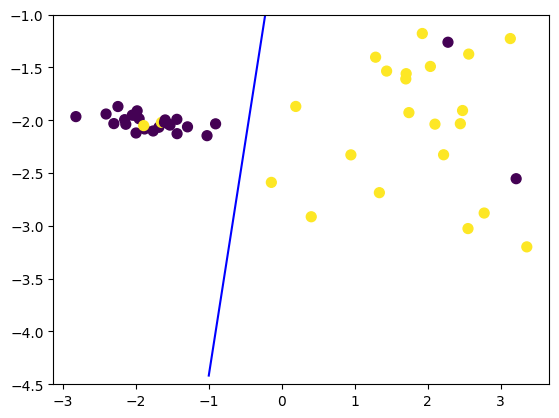

In [4]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
X, y = make_classification(n_samples=50, n_features=2, n_informative = 2, n_redundant = 0, n_clusters_per_class = 1, flip_y = 0.1, class_sep = 2, random_state=20)
y=pd.Series(y)
y.replace({0:-1},inplace=True)
X=pd.DataFrame(X)

def Perceptron():
  w=np.array([0,0])
  for i in range(10):
    dash=False
    c=0
    for j in range(0,X.shape[0]):
      if(np.dot(w,np.array(X.iloc[j,]))>=0):
        y_pred=1
      else:
        y_pred=-1
      if(y_pred!=y[j]):
        dash=True
        c+=1
        w=w+y[j]*np.array(X.iloc[j,])
    print('epoch: ',i,'updates: ',c)
    if dash==False:
      print(i+1)
      break
  return w

w=Perceptron()

plt.scatter(X.iloc[:,0],X.iloc[:,1], c=y, cmap='viridis', s=50)
m= -1/(w[1]/w[0])
xl = np.linspace(-1, 1, 100)
yl = m * xl
plt.plot(xl, yl, color="blue")
plt.ylim(-4.5, -1)
plt.show()